In [1]:
#Covid19 Data Analysis Notebook
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [2]:
corona_dataset_csv = pd.read_csv("covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
corona_dataset_csv.shape

(266, 104)

In [4]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
cornona_dataset_aggregated= corona_dataset_csv.groupby("Country/Region").sum()
cornona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
cornona_dataset_aggregated.shape

(187, 100)

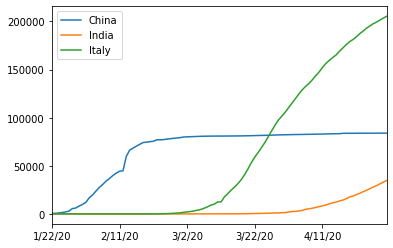

In [16]:
#Visualizing data related to a country 
cornona_dataset_aggregated.loc["China"].plot()
cornona_dataset_aggregated.loc["India"].plot()
cornona_dataset_aggregated.loc["Italy"].plot()
plt.legend()

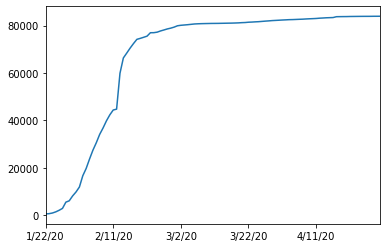

In [18]:
#Calculating a good measure 
# need to find a good measure reperestend as a number, describing the spread of the virus in a country.
cornona_dataset_aggregated.loc['China'].plot()

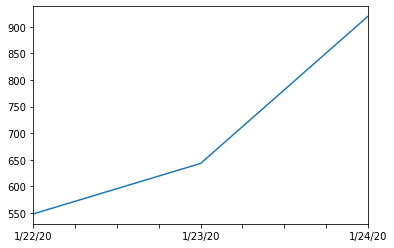

In [19]:
cornona_dataset_aggregated.loc['China'][:3].plot()

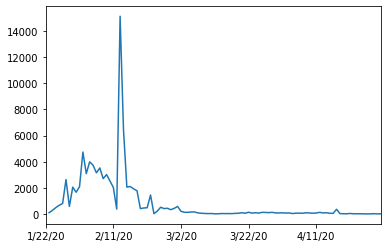

In [20]:
# caculating the first derivative of the curve
cornona_dataset_aggregated.loc['China'].diff().plot()

In [21]:
#find maxmimum infection rate for China
cornona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [22]:
cornona_dataset_aggregated.loc['Italy'].diff().max()

6557.0

In [23]:
cornona_dataset_aggregated.loc['India'].diff().max()

1893.0

In [25]:
#find maximum infection rate for all of the countries. 
countries =list(cornona_dataset_aggregated.index)
max_infection_rate =[]
for c in countries:
    max_infection_rate.append(cornona_dataset_aggregated.loc[c].diff().max())
cornona_dataset_aggregated["max_infection_rate"]=max_infection_rate
    
    

In [26]:
cornona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [28]:
#create a new dataframe with only needed column 
corona_data =pd.DataFrame(cornona_dataset_aggregated["max_infection_rate"])

In [29]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [31]:
#Importing the WorldHappinessReport.csv dataset
World_Happy = pd.read_csv("worldwide_happiness_report.csv")
World_Happy.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [32]:
useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [33]:
World_Happy.drop(useless_cols,axis=1,inplace=True)
World_Happy.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [34]:
#changing the indices of the dataframe
World_Happy.set_index("Country or region",inplace=True)


In [35]:
World_Happy.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [40]:
#now let's join two dataset we have prepared  
corona_data.head()




,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [41]:
corona_data.shape

(187, 1)

In [42]:
World_Happy.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [43]:
World_Happy.shape

(156, 4)

In [44]:
data=corona_data.join(World_Happy,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [45]:
#correlation matrix 
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


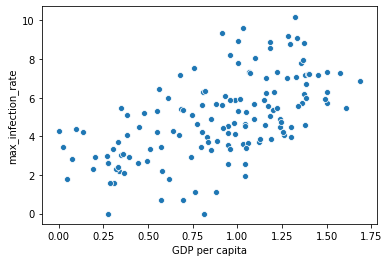

In [56]:
#Visualization of the results
#Plotting GDP vs maximum Infection rate

X=data["GDP per capita"]
Y=data["max_infection_rate"]
sns.scatterplot(X,np.log(Y))

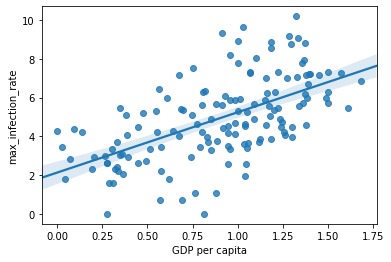

In [57]:
sns.regplot(X,np.log(Y))

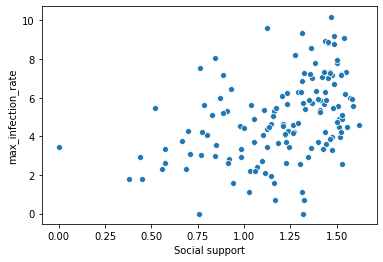

In [59]:
#Plotting Social support vs maximum Infection rate

X=data["Social support"]
Y=data["max_infection_rate"]
sns.scatterplot(X,np.log(Y))


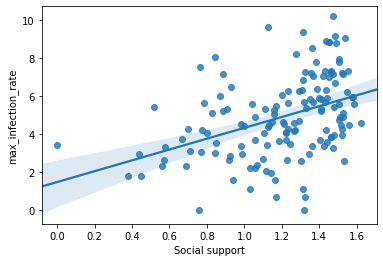

In [62]:
sns.regplot(X,np.log(Y))

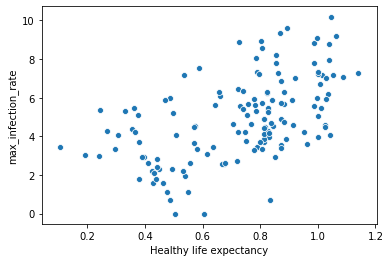

In [63]:
#Plotting Healthy life expectancy vs maximum Infection rate
X=data["Healthy life expectancy"]
Y=data["max_infection_rate"]
sns.scatterplot(X,np.log(Y))



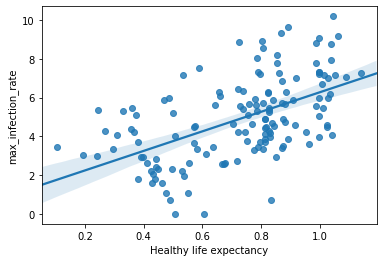

In [64]:
sns.regplot(X,np.log(Y))

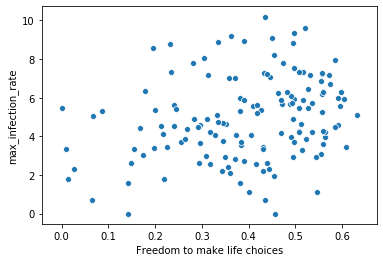

In [65]:
#Plotting Freedom to make life choices vs maximum Infection rate
X=data["Freedom to make life choices"]
Y=data["max_infection_rate"]
sns.scatterplot(X,np.log(Y))


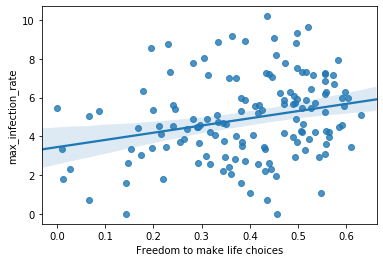

In [66]:
sns.regplot(X,np.log(Y))